<a href="https://colab.research.google.com/github/Lucas-Silva-R/Portfolio-de-Projetos/blob/main/An%C3%A1lise_Airbnb_Cidade_de_Ottawa%2C_Ontario%2C_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg" width=70% alt = "Icone Airbnb">

## Análise de dados Airbnb - Cidade de Ottawa, Ontario, Canadá

*por [Lucas Ribeiro da Silva](https://www.linkedin.com/in/lucas-ribeiro-silva/)*

---

O [Airbnb](https://www.airbnb.com.br/) consiste em uma das maiores startups do ramo de hospedagem e turismo hoje. A empresa se destaca pelo seu modelo de negócios de plataforma mediadora, ou seja, através dela, pessoas que necessitam de um imóvel para residir por certo tempo facilmente se conectam a indivíduos que desejam alugar seus imóveis. Os principais ganhos da Airbnb advém de uma taxa cobrada sobre cada transação, mas a real vantagem deste negócio consiste no fato dela não ser proprietária de nenhum dos imóveis anunciados e, desse modo, não arcam com o pagamento de taxas de manutenção do ativo e impostos como IPTU.

A Airbnb apresentou no final de 2021 um LAJIR (Lucro antes de Juros e Imposto de Renda) de **$333 milhões** com um total de **2,9 milhões de hóspedes**.

Vários destes hóspedes buscam o Airbnb por motivos diferentes - turismo, viagem a negócios, intercâmbio. Pessoalmente, sempre tive como sonho viver no Canadá (na região que fale Inglês, pois não sei Francês ainda hahaha), mas sendo uma decisão com muitas repercussões, um primeiro passo seria visitar uma região de interesse e sentir se seria possível viver lá por um longo tempo. 

Por isso, decidi aproveitar a oportunidade e, em vez de simplesmente realizar uma típica busca pela plataforma, analisar os dados históricos referentes a cidade Ottawa em Ontário que, possivelmente, irão trazer melhores insights sobre as ofertas na cidade e quanto seria necessário investir para fazer uma viagem destas. 

---

#####*Ontario durante o Outono*


<img src="https://img.freepik.com/free-photo/autumn-ottawa-valley_181624-18863.jpg?w=740" width=70% alt="Cidade_de_Ontario">

---





##Obtenção dos Dados

Primeiramente, foi necessário obter uma quantidade robusta de informações históricas referentes às ofertas existentes na cidade para podermos alcançar os objetivos da pesquisa. Nesse sentido, os dados utilizados foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html), um projeto ativista que foca em expor e quantificar o impacto gerado pelos aluguéis da Airbnb sobre as comunidades onde a empresa opera. 

Para aqueles interessados em replicar a análise presente neste projeto posteriormente, o arquivo utilizado foi: 

* `listing.csv - Summary information and metrics for listings in Ottawa`

Também foi necessário preparar as ferramentas necessárias para realizar a nossa análise. Para tanto, importamos os pacotes Pandas e Matplotlib. 

O Pandas é a principal ferramenta utilizada na análise. Ele permite importar arquivos , exibir seus dados, tratar valores ausentes e outliers, além de diversas outras funções. O Matplotlib tem como principal função auxiliar na exibição gráfica das informações presentes nos dados de forma a facilitar a interpretação pelos leitores.

In [ ]:
#importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Em seguida, utilizando o Pandas, importamos o respectivo arquivo de extensão .csv com os dados da cidade de Ottawa diretamente de seu site de origem e atribuimos ele à um objeto chamado "df" que será nosso DataFrame, ou seja, nossa base de dados. 

In [ ]:
#importar o arquivo para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/on/ottawa/2021-12-12/visualisations/listings.csv', parse_dates=True)

##Análise dos Dados

Iniciando nossa análise dos dados da cidade de Ottawa, como primeiro passo é muito importante examinar e entender quais informações estão disponíveis em nossa fonte de dados.

Para tanto é essencial realizar alguns procedimentos:
* Criar um dicionário das variáveis de cada coluna, esclarecendo qual informação cada uma delas está trazendo. 
* Examinar o tamanho total da base (nº de linhas e nº de colunas) para entender quantos dados temos disponíveis.
* Verificar o tipo de dado em cada coluna, pois é possível, por exemplo, que dados numéricos possuam formato de texto, o que pode afetar o uso de certas análises.
* Investigar a presença de valores nulos e outliers na base. Dependo do seu tamanho e caso específico, valores nulos e outliers podem prejudicar análises estatísticas como média e mediana que levam a alterações nas conclusões do estudo. Deve-se verificar de forma detalhada de que maneira estes valores contribuem ou prejudicam o estudo e optar pela sua remoção ou modificação de acordo com o caso.

**Dicionário de variáveis - Resumo das variáveis presentes na base estudada**

* `id` - Código de identificação único atribuido ao anuncio. Exclusivo para cada anúncio.
* `name` - Nome que foi atribuido ao anuncio por seu locador,
* `host_id` - Código de identificação único atribuido ao usuário locador do imóvel anunciado.
* `host_name` - Nome do locador do respectivo imóvel anunciado.
* `neighbourhood_group` - Nome do grupo utilizado para categorizar um conjunto de diferentes bairros. **O Valor é nulo**.
* `neighbourhood` - Nome do bairro onde o imóvel anunciado se localiza.
* `latitude` - Posição geográfica da latitude do imóvel anunciado.
* `longitude` - Posição geográfica da longitude do imóvel anunciado.
* `room_type` - Tipo de oferta dentre categorias fechadas (1. espaço inteiro; 2. quarto independente; 3. quarto compartilhado).
* `price` - Valor da diária na moeda local,
* `minimum_nights` - Menor número de noites obrigatórias para residir no imóvel.
* `number_of_reviews` - Total de avaliações que o anuncio recebeu.
* `last_review` - Data da avaliação mais recente que o anuncio recebeu.
* `reviews_per_month` - Total de avaliações que o anuncio possui desde que foi criado.
* `calculated_host_listings_count` - Total de anuncios que o anunciante possui.
* `availability_365` - Total de dias que o imóvel está disponível dentr de um período de 365 dias.
* `number_of_reviews_ltm` - Total de avaliações que o anuncio possui dentro de um intervalo de 12 meses
* `license` - Número de registro/permissão/licensa. **Valores são nulos**.

###Verificação inicial dos dados

1) Primeiro, verificamos o volume total do nosso banco de dados (atributos/colunas e entradas/linhas) para esclarecer o tamanho da nossa amostra e o tipo dos dados presentes em cada uma das colunas, afim de identificar alguma tipagem errada.

In [ ]:
#Volume de dados do DataFrame
print("Atributos/Colunas:\t {}".format(df.shape[1]))
print("Entradas/Linhas:\t {}\n".format(df.shape[0]))

df.dtypes

Atributos/Colunas:	 18
Entradas/Linhas:	 2621



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

2) Em seguida, iremos visualizar algumas das entradas iniciais (as 5 primeiras) da nossa fonte de dados, com o intuíto de entender por alta as características dessas informações e verificar indícios de valores nulos ou algum outro fator relevante. 

In [ ]:
# Leitura inicial dos dados
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,34220,Room available,147438,Mark,NaN,Capital,45.40924,-75.67900,Private room,202,7,0,NaN,NaN,1,0,0,NaN
1,36642,City Conveniences A Country Setting,157787,Donna,NaN,Kitchissippi,45.40159,-75.74679,Private room,65,3,87,2020-02-17,0.63,1,346,0,NaN
2,59258,Lower level of my house to rent,284351,Elena,NaN,Bay,45.35900,-75.80314,Entire home/apt,200,3,1,2011-07-04,0.01,1,0,0,NaN
3,158824,DOWNTOWN/GLEBE HOUSE WITH BACKYARD,87296,Luc,NaN,Capital,45.40248,-75.69941,Entire home/apt,140,3,7,2015-08-30,0.06,1,309,0,NaN
4,261065,Westboro Village Executive Suite,1369632,Glenn,NaN,Kitchissippi,45.38972,-75.75496,Entire home/apt,155,3,66,2021-11-21,0.54,1,238,2,NaN


* Como pode-se verificar desta visualização inicial, algumas entradas possuem valores nulos classificados como **NaN** ou **vazios**. Importante destacar que também foram identificados valores **0**, mas isto não significa que sejam nulos. No caso da coluna `number_of_reviews` o valor 0 indica que não houveram avaliações para aquele anuncio.

* Como mencionado previamente, uma base de dados com muitos valores ausentes pode prejudicar a realização de análises estatísticas e obtenção de resultados fidedignos. Portanto, é necessário verificar o total de valores ausentes na base e a proporção percentual que eles representam em relação ao total de dados disponíveis.

In [ ]:
#Ordenar variáveis por valores ausentes
df.isnull().sum().sort_values(ascending=False)

license                           2621
neighbourhood_group               2621
reviews_per_month                  424
last_review                        424
minimum_nights                       0
number_of_reviews_ltm                0
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
id                                   0
name                                 0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
host_name                            0
host_id                              0
price                                0
dtype: int64

In [ ]:
#Ordenar variáveis por valores ausentes (percentual)
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

license                           1.00000
neighbourhood_group               1.00000
reviews_per_month                 0.16177
last_review                       0.16177
minimum_nights                    0.00000
number_of_reviews_ltm             0.00000
availability_365                  0.00000
calculated_host_listings_count    0.00000
number_of_reviews                 0.00000
id                                0.00000
name                              0.00000
room_type                         0.00000
longitude                         0.00000
latitude                          0.00000
neighbourhood                     0.00000
host_name                         0.00000
host_id                           0.00000
price                             0.00000
dtype: float64

* Pode-se verificar que as colunas `license` e `neighbourhood_group` possuem **100%** de seus valores nulos. Assim, não possuem nenhuma capacidade de contribuir para a preesente análise.

* Já ambos os atributos `reviews_per_month` e `last_review` apresentaram **424** valores vazios, representando **16,17%** do total. Isto se deve ao fato destes atributos estarem associados a coluna `number_of_reviews` que contém o número de avaliações dadas a certo local anunciado. Quando o local possui 0 avaliações, estes demais campos não podem ser calculados e retornam valores nulos.

* Todos os demais atributos não apresentaram valores nulos.

Em síntese, como as colunas `license` e `neighbourhood_group` não contribuem em nada para o estudo, elas poderiam facilmente ser eliminadas. De maneira similar, as colunas `reviews_per_month` e `last_review`, por estarem associadas a coluna `number_of_reviews` não contribuem tanto quanto poderiam para o estudo, mas ainda possuem muitos valores preenchidos e, portanto, faz sentido mantê-las com seus dados ausentes.

3) Em seguida, é interesse analisar a forma como os valores das diferentes colunas estão distribuidos na base e, possívelmente, identificar distribuições discrepantes que indicariam a presença de outliers. 

A melhor forma de fazer isto é através de um **histograma**, que ["representa a quantidade e a frequencia de cada classe de valor presente"](https://www.alura.com.br/artigos/o-que-e-um-histograma) (Siqueira, 2021). Importante destacar que **somente atributos com valores numéricos (inteiros ou flutuantes) aparecerão como histogramas**.  

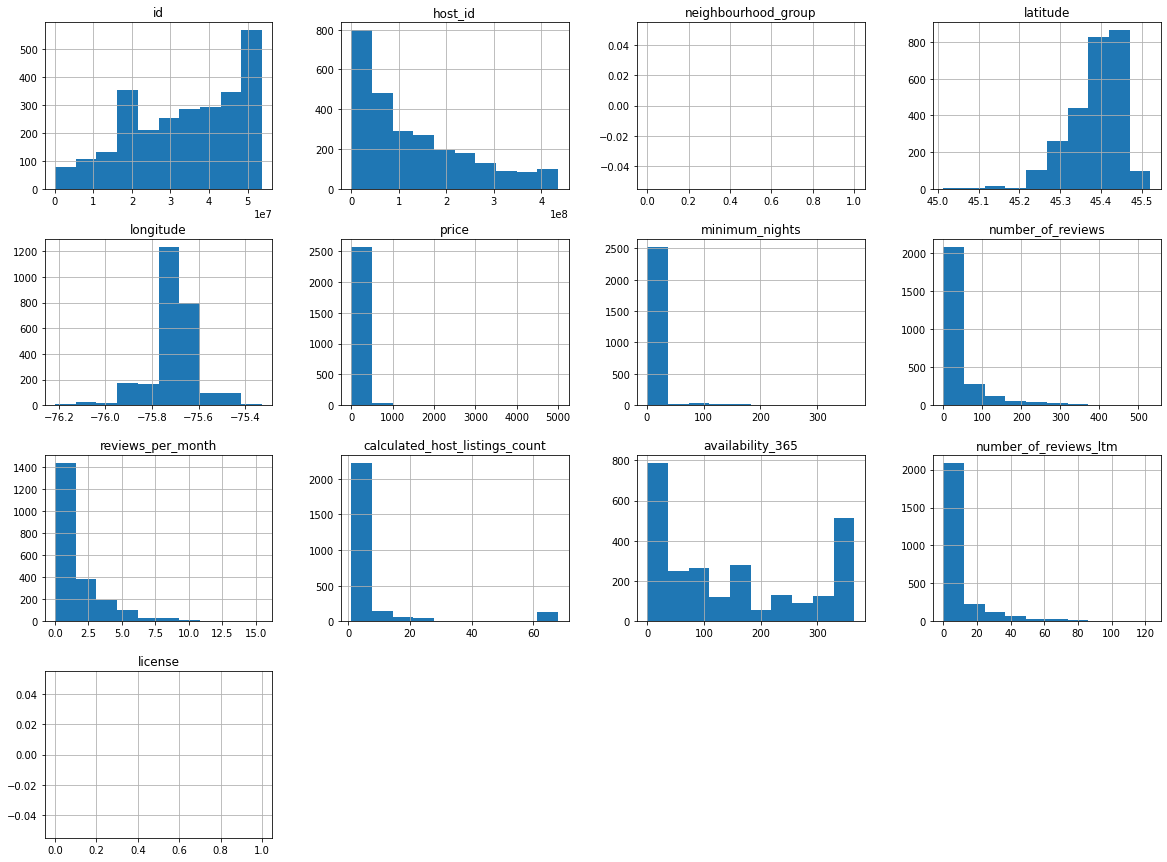

In [ ]:
#Histograma com as variáveis numéricas
df.hist(figsize=(20,15));

* Dos histogramas gerados, as informações mais importantes para a presente análise serão `price`, `minimum_nights`, `number_of_reviews`, `latitude`, `longitude`.

* Inicialmente podemos verificar alguns pontos interessantes:
  * A maior parte das ofertas possuem um **preço** entre **0 e $500** dolares canadenses.
  * A maior parte do número mínimo de noites não chega a **50** noites.
  * A maior parte dos anuncios possui um número de avaliações entre **0 e 50**.
  * Baseado nos resultados para `latitude` e `longitude`, é possível confirmar que a maior parte das localidades estão em torno de **45.4 e -75.9**, que, ao analisar em aplicativos de localização, mostram que são próximos do centro de Ottawa.

* Importante observar que, das colunas destacadas como mais importantes, algumas apresentaram indícios de **outliers** - [dados que se diferenciam fortemente da normalidade dos demais dados](https://www.aquare.la/o-que-sao-outliers-e-como-trata-los-em-uma-analise-de-dados/) (Hoppen & Prates, 2017) - devido a alta concentração de valores em um dos lados do histograma frente a uma alta distribuição de valores. Nesse caso, é necessário comprovar sua presença e, dependendo do efeito que geram para a análise, modificá-los ou eliminá-los.

* Desse modo, devem ser realizados os seguintes passos:
  * Realizar o resumo estatístico dos dados para confirmar a discrepância em forma numérica.
  * Utilizar **boxplots** por variável para evidenciar essa discrepância graficamente.

In [ ]:
#Resumo estatístico
df[['price', 'minimum_nights', 'number_of_reviews']].describe()

,price,minimum_nights,number_of_reviews
count,2621.000000,2621.000000,2621.000000
mean,128.653949,10.631438,36.656238
std,195.341356,30.977707,64.337135
min,0.000000,1.000000,0.000000
25%,61.000000,1.000000,2.000000
50%,94.000000,2.000000,10.000000
75%,140.000000,6.000000,40.000000
max,5000.000000,365.000000,531.000000


3.1) Como primeiras observações que podem ser identificadas da análise estatística:

* Na variável `price` **75%** de todos os valores são menores que **140**. Entretanto, o valor máximo chega à **5000** dólares, **53** vezes maior que a mediana.

* Na variável `minimum_nights` **75%** de todos os valores são menores que **6**. Entretanto, o valor máximo chega à **365** dias (um ano completo), 182,5 vezes maior que a mediana.

* Na variável `number_of_reviews` **75%** de todos os valores são menores **40**. Entretanto, o valor máximo chega à 531 avaliações, **53,1** vezes maior que a mediana.

Claramente, estes resultados dão indícios de que existem outliers com valores em `price`, `minimum_night` e `number_of_reviews` muito maiores do que o resto dos valores.

3.2) Como próximo passo, é necessário determinar a influência que estes outliers têm em relação aos demais dados e decidir se devem ser modificados ou removidos. Para tanto, é necessário determinar com precisão quais valores são efetivamente outliers. Isto pode ser feito através do cálculo do limite superior e inferior dos dados através do Intervalo Interquartílico. Para auxiliar no entendimento desse procedimento, seguem explicações básicas dos elementos envolvidos e do cálculo realizado.

* 1º quartil (Q1) - valor do conjunto que delimita os 25% menores valores
* 3º quartil (Q3) - valor do conjunto que delimita os 75% menores valores
* Intervalo Interquartílico (IQR) - Indicador de dispersão dos dados. A fórmula abaixo representa o cálculo:  
  $\mathrm 
  IQR = Q_3 - Q_1 
  $  
* Limite Superior (LS) - 95% de todos os dados se encontram abaixo desse valor. Qualquer valor maior é considerado um outlier. A formula abaixo representa o calculo:  
  $\mathrm 
  Lim_s = Q_3 + 1,5 * IQR 
  $  
* Limite Inferior (LI) - 95% de todos os dados se encontram acima desse valor. Qualquer valor menor é um considerado outlier. A formula abaixo representa o calculo:  
  $\mathrm 
  Lim_i = Q_1 - 1,5 * IQR 
  $  

In [ ]:
#Price
#Calculando o Intervalor Interquartílico
q1_price = 61
q3_price = 140
iqr_price = q3_price - q1_price
print("IQR 'price': {}".format(iqr_price))

#Calculando os Limites
LS_price = q3_price + 1.5 * iqr_price
LI_price = q1_price - 1.5 * iqr_price
print("Limite Superior 'price': {}".format(LS_price))
print("Limite Inferior 'price': {}".format(LI_price))

IQR 'price': 79
Limite Superior 'price': 258.5
Limite Inferior 'price': -57.5


In [ ]:
#minimum_nights
#Calculando o Intervalor Interquartílico
q1_minimum_nights = 1
q3_minimum_nights = 6
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights
print("IQR 'minimum_nights': {}".format(iqr_minimum_nights))

#Calculando os Limites
LS_minimum_nights = q3_minimum_nights + 1.5 * iqr_minimum_nights
LI_minimum_nights = q1_minimum_nights - 1.5 * iqr_minimum_nights
print("Limite Superior 'minimum_nights': {}".format(LS_minimum_nights))
print("Limite Inferior 'minimum_nights': {}".format(LI_minimum_nights))

IQR 'minimum_nights': 5
Limite Superior 'minimum_nights': 13.5
Limite Inferior 'minimum_nights': -6.5


In [ ]:
#number_of_reviews
#Calculando o Intervalor Interquartílico
q1_number_of_reviews = 2
q3_number_of_reviews = 40
iqr_number_of_reviews = q3_number_of_reviews - q1_number_of_reviews
print("IQR 'number of reviews': {}".format(iqr_number_of_reviews))

#Calculando os Limites
LS_number_of_reviews = q3_number_of_reviews + 1.5 * iqr_number_of_reviews
LI_number_of_reviews = q1_number_of_reviews - 1.5 * iqr_number_of_reviews
print("Limite Superior 'number_of_reviews': {}".format(LS_number_of_reviews))
print("Limite Inferior 'number_of_reviews': {}".format(LI_number_of_reviews))

IQR 'number of reviews': 38
Limite Superior 'number_of_reviews': 97.0
Limite Inferior 'number_of_reviews': -55.0


Em seguida, serão exibidos estes valores na forma de Boxplots, [uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados](https://operdata.com.br/blog/como-interpretar-um-boxplot/) (Oper, 2019).

Será exposto também a quantidade total de valores classificados como outliers e a proporção que estes valores representam em relação total dos dados.

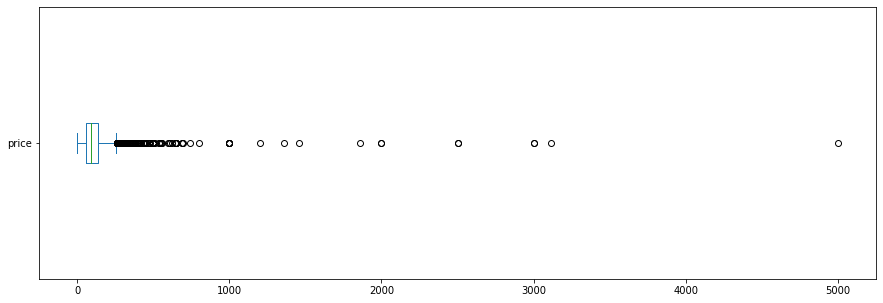

A base possui um total de 2621 entradas.
Destas, 174 possuem outliers no atributo 'price'.
Ao todo, estes outliers representam 6.64% de todos os dados presentes.


In [ ]:
#Boxplot price
df['price'].plot(kind='box', vert=False, figsize=(15, 5))
plt.show()

print("A base possui um total de {} entradas.".format(df.shape[0]))
print("Destas, {} possuem outliers no atributo 'price'.".format(len(df[df['price'] > 258.5])))
print("Ao todo, estes outliers representam {:.2f}% de todos os dados presentes.".format(len(df[df['price'] > 258.5]) / df.shape[0] * 100))

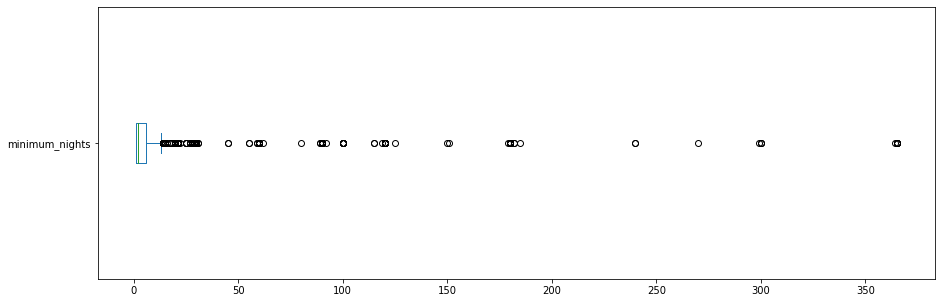

A base possui um total de 2621 entradas.
Destas, 486 possuem outliers no atributo 'minimum_nights'
Ao todo, estes outliers representam 18.54% de todos os dados presentes.


In [ ]:
#Boxplot minimum_nights
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15, 5))
plt.show()
print("A base possui um total de {} entradas.".format(df.shape[0]))
print("Destas, {} possuem outliers no atributo 'minimum_nights'".format(len(df[df['minimum_nights'] > 13.5])))
print("Ao todo, estes outliers representam {:.2f}% de todos os dados presentes.".format(len(df[df['minimum_nights'] > 13.5]) / df.shape[0] * 100))

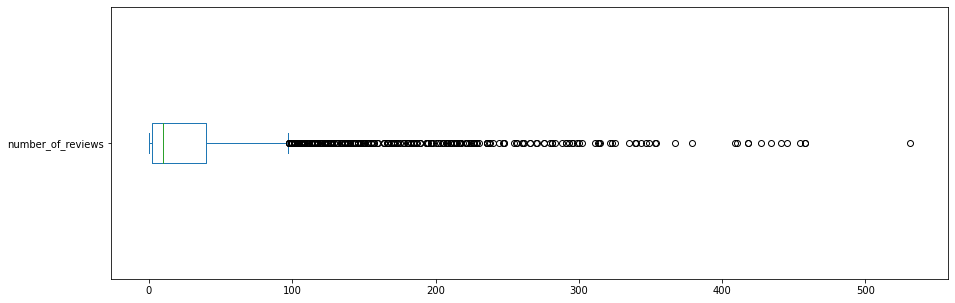

A base possui um total de 2621 entradas.
Destas, 293 possuem outliers no atributo 'number_of_reviews'
Ao todo, estes outliers representam 2.02% de todos os dados presentes.


In [ ]:
#Boxplot number_of_reviews
df['number_of_reviews'].plot(kind='box', vert=False, figsize=(15, 5))
plt.show()
print("A base possui um total de {} entradas.".format(df.shape[0]))
print("Destas, {} possuem outliers no atributo 'number_of_reviews'".format(len(df[df['number_of_reviews'] > 97])))
print("Ao todo, estes outliers representam {:.2f}% de todos os dados presentes.".format(len(df[df['minimum_nights'] > 97]) / df.shape[0] * 100))

3.3) Verificamos que nas colunas `price` e `number_of_reviews` a quantidade de outliers represente **6,64%** e **2,02%**, um valor bem pequeno. Portanto, sua remoção não irá gerar um impacto grande na análise que deseja ser feita. Já a coluna `minimum_nights` possui **18,54%** como outliers (quase 1/5 dos dados). Em geral, seria necessário estudar de modo mais aprofundado para entender como melhor tratar estes outliers, mas como o propósito do estudo é encontrar é explorar as informações de aluguéis na cidade de Ottawa, de forma a encontrar as opções mais em conta possíveis, valores muito altos não são interessantes e, assim, podem ser eliminados no caso presente.

Portanto, faremos a remoção dos outliers destas 3 colunas. Por questões de segurança, criaremos um cópia da base original antes de realizarmos uma remoção deste tipo.

In [ ]:
#Criando uma cópia para preservar a base original
df_original = df.copy()

In [ ]:
#Removendo os outliers

#price
df['price'] = df['price'].drop(df[df['price'] > 258.5].index, axis=0)

#minimum_nights
df['minimum_nights'] = df['minimum_nights'].drop(df[df['minimum_nights'] > 13.5].index, axis=0)

#number_of_reviews
df['number_of_reviews'] = df['number_of_reviews'].drop(df[df['number_of_reviews'] > 97].index, axis=0)

4) Feita a remoção dos outliers, podemos proceder analisando primeiro o atributo `price`. Dentre as varias informações relevantes, é interessante entender qual o valor que, em **média**, é cobrado por um aluguel na cidade de Ottawa e também qual tende a ser o valor cobrado na maior parte dos casos (**mediana**).

In [ ]:
#Média do valor do anuncio
df['price'].mean()

99.13240702901513

* O valor médio, de forma geral, na cidade de Ottawa totaliza em um valor de **99,13 dólares canadenses** que em reais atualmente (16/03/2021) seria o equivalente a **396,52 reais** por dia.

* A mediana do valor de uma diária, de forma geral, na cidade de Ottawa totaliza em um valor de **89,00 dólares canadenses** que em reais atualmente (10/03/2021) seria o equivalente a **356,00 reais** por dia.

5) Diversos fatores podem estar envolvidos com o preço de um certo anuncio, como sua localização e total de avaliações positivas. Desse modo, se mostra interessante examinar se, dentre os atributos presentes na base, existe algum tipo de correlação entre eles, ou seja, o grau de semelhança de comportamento entre dois grupos de dados. 

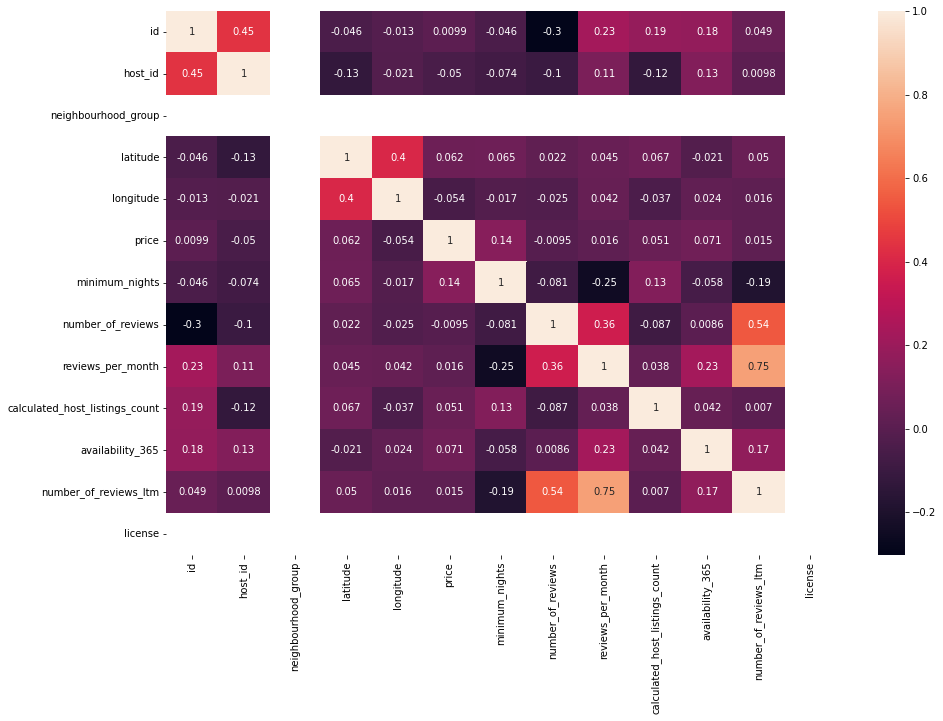

In [ ]:
#Matriz de correlação entre atributos
df_corr = df.corr()

#Mapa de calor das correlações
f, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(df_corr, annot=True)

* Baseado nestes resultados, percebe-se que o atributo `price` não possui forte correlação com nenhum outro atributo na base. Pode enfatizar a correlação entre `price` e `minimum_nights` de 14%. Considerando que um número maior de dias hospedado aumenta o preço cobrado, faz sentido existir tal correlação, mesmo sendo baixa.

* Ademais, podem ser identificadas correlações lógicas como a relação entre `latitude` e `longitude`, e atributos relacionados a quantidade de avaliações de um anuncio (`number_of_reviews`, `reviews_per_month`, `number_of_reviews_ltm`)

6) Agora que temos uma noção quanto a média e mediana geral do preço de um anúncio, interessa também examinar qual o tipo de anuncio mais frequente criado por usuários locadores, pois certas categorias de oferta fazem mais sentido para um intercambista de 1 mês de jornada do que alguém que ficaria por mais tempo.

In [ ]:
#Quantidade de imóvel mais alugado no Airbnb
df['room_type'].value_counts()

Entire home/apt    1640
Private room        960
Shared room          16
Hotel room            5
Name: room_type, dtype: int64

In [ ]:
#Percentual de imóvel mais alugado no Airbnb
print((df['room_type'].value_counts() / df.shape[0]) * 100)

Entire home/apt    62.571538
Private room       36.627242
Shared room         0.610454
Hotel room          0.190767
Name: room_type, dtype: float64


* Verifica-se que o principal tipo de anúncio em Ottawa são aqueles oferecendo a **localidade inteira (casa / apartamento)** ou um **quarto individual** em uma residência.

* Ao todo são **1.640** anuncios de localidade inteira, representando **62,57%** de todos os anuncios e **960** anuncios de quartos individuais, representando **36,63%** de todos os anuncios. 

* Ambas as categorias juntas representam **99,20%** de todos os anuncios. Praticamente a totalidade de opções disponíveis em Ottawa. 

7) Agora que sabemos a média de preço geral de um anuncio no Airbnb e as principais categorias de anuncios disponíveis, é importante investigar qual a média dos preços dependendo dos bairros e verificar quais estão acima ou abaixo da média geral.

In [ ]:
#Preços por bairros na média
df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

neighbourhood
West Carleton-March        128.138889
Capital                    122.456954
Kitchissippi               114.106250
Somerset                   105.003125
Rideau-Vanier              104.842000
Rideau-Goulbourn           103.833333
Cumberland                  97.079365
Bay                         95.458333
College                     94.608696
Alta Vista                  94.441860
Rideau-Rockcliffe           94.047297
Kanata North                92.890244
Kanata South                92.061224
River                       91.926606
Gloucester-South Nepean     91.358025
Osgoode                     90.250000
Barrhaven                   88.610390
Knoxdale-Merivale           86.808219
Beacon Hill-Cyrville        83.901961
Gloucester-Southgate        83.309524
Stittsville-Kanata West     80.901961
Orleans                     75.148148
Innes                       65.809524
Name: price, dtype: float64

* Em geral, **6** bairros (26%) possuem médias de preço maiores que a média geral de todos os anuncios. Ou seja, a maioria dos bairros possuem preços medianos ou baixos, o que é interessante pois são mais opções disponíveis para alguém que irá se hospedar na cidade por um tempo.


Interessa também verificar a localização geográfica dos anuncios e determinar se eles são mais ou menos concentrados em certas regiões. 

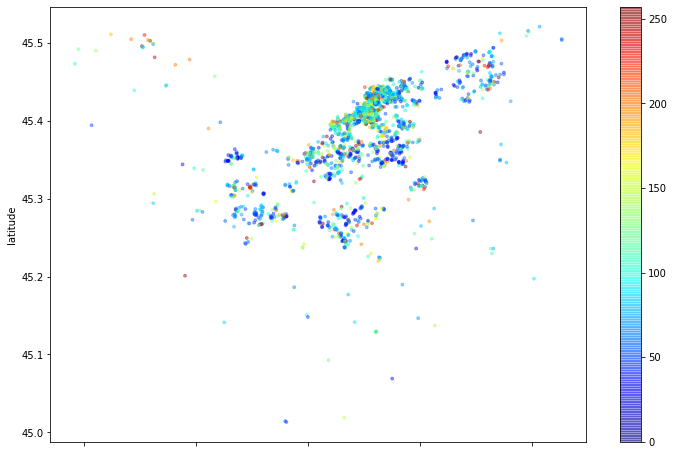

In [ ]:
#Imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

* Pode-se perceber que existe uma grande concentração de anuncios em torno da latitude 45.4 e longitude -75.9. Em geral, estas posições se encontram próximo da região mais urbanizada da cidade, o que faz sentido.

8) Por último, interessa verificar também qual a quantidade mínima de noites em média que seriam necessárias para residir em certo imóvel. Isso é relevante para determinar a uma margem mínima de liberdade que existe no tempo que seria necessário para fazer o intercâmbio.

In [ ]:
#Média da coluna mínimum nights
print('Média mínima de noites: {:.0f}'.format(df['minimum_nights'].mean()))

Média mínima de noites: 2


###Conclusões

Baseado nesse breve estudo realizado, as seguintes conclusões podem ser obtidas da análise:

1) Baseado na média geral de preço (`price`) e mínimo de noites obrigatórias (`minimum_nights`), caso eu ou qualquer outra pessoa deseje fazer uma viagem para Ottawa, deve-se esperar minimamente uma estadia de **2 a 3 dias** por um valor médio de **99 dólares canadenses (396,00 reais)** que se traduzem em um gasto total médio entre **198,00 e 297,00 dólares canadenses** ou **792,00 e 1188,00 reais.** 

Para estadias mais longas (1 ou 2 semanas para conhecer a cidade), este valor pode chegar a, em média, entre **693,00 e 1.386,00 dólares canadenses** ou **2.772,00 e 5.544,00 reais.** 

2) Existem certas alternativas que ajudariam a encontrar localizações mais baratas. Ao analisar a média de preço por bairro separados por tipo de quarto (inteiro, quarto privado, quarto compartilhado) percebe-se que a média de valor do espaço inteiro é o **dobro** da média de um quarto privado. Apesar de quartos privados serem 1/3 do total de ofertas disponiveis, esta seria uma alternativa boa para economizar. Estima-se que uma diária em um quarto privado seria em torno de **63,00 dólares canadenses** ou **252,00 reais**. Pelo período mínimo de 2 dias, isto totalizaria em um valor aproximado de **126,00 dólares**, equivalente a **504,00 reais**. Por um período de 1 a 2 semanas seria um total de **441,00 a 882,00 dólares**, equivalente a **1764,00 a 3528,00 reais**.

In [ ]:
#Preços por bairros na média
df.groupby('room_type')['price'].mean().sort_values(ascending=False)

room_type
Hotel room         163.000000
Entire home/apt    122.360269
Private room        63.217391
Shared room         48.062500
Name: price, dtype: float64

3) Em relação aos bairros, é possível perceber que as localidades com menor preço de diária estão em regiões de subúrbio como é o caso de **Órleans, Barrhavan e Kanata** o que é algo esperado. Apesar de não serem locais dentro da região central da cidade, o tempo médio que leva de carro entre um destes bairros e a região central é em torno de **15 a 20 minutos**, um período bem curto. Desse modo uma outra alternativa para reduzir os custos seria a hospedagem em regiões de suburbio. A média das médias das 12 cidades mais baratas fica em torno de **85,00 dolares canadenses**, equivalente a **340,00 reais**. Assim, uma estadia de 2 dias ficaria em torno de **170,00 dolares** ou **680,00 reais**. Por um período de 1 a 2 semanas, este valor ficaria entre **595,00 e 1190,00 dólares**, equivalente a valores entre **2.380,00 e 4.760,00 reais**.

4) Por último, é importante destacar a relevância que teve examinar os outliers neste estudo. Foram identificados valores bem altos e discrepantes em relação aos demais nos campos de preço (`price`) e mínimo de dias (`minimum_nights`). Caso não fossem ajustados, prejudicariam na geração de uma visão fidedigna quanto a médias e medianas dos valores de ambos estes campos. Dito isto, a escolha pela eliminação destes outliers foi justificada pelo interesse definido de obter a oferta mais econômica para residir na cidade. Dependendo do objetivo geral do estudo, pode ser interessante manter os outliers na análise, ou mesmo examiná-los de forma separada pelo valor de insights que podem trazer. 